In [90]:
import pandas as pd

In [91]:
loan_details=pd.read_excel("../data/loan_details.xlsx")
loan_details['loan_amount']=loan_details['loan_amount'].replace('[\$,]', '', regex=True).astype(float)
loan_details.head()

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,Personal,17700.0,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,114000.0,180,6.83,Refinance,0.774,Branch,1011,B
2,10002,Personal Loan,9300.0,36,13.99,Major Purchase,0.000,Online,1084,K
3,10003,PERSONAL,8700.0,48,13.26,Medical,0.000,Online,1048,A
4,10004,Personal,7200.0,24,10.77,Debt Consolidation,0.000,Branch,1055,S


In [92]:
loan_details.isna().sum()

customer_id            0
loan_type              0
loan_amount            0
loan_term              0
interest_rate          0
loan_purpose           0
loan_to_value_ratio    0
origination_channel    0
loan_officer_id        0
marketing_campaign     0
dtype: int64

In [93]:
loan_map = {
    'cc': 'Credit Card',
    'credit card': 'Credit Card',
    'creditcard': 'Credit Card',
    'home loan': 'Mortgage',
    'mortgage': 'Mortgage',
    'personal': 'Personal Loan',
    'personal loan': 'Personal Loan'
}
loan_details['loan_type'] = loan_details['loan_type'].str.lower().map(lambda x: loan_map.get(x, x))
print(loan_details)

       customer_id      loan_type  loan_amount  loan_term  interest_rate  \
0            10000  Personal Loan      17700.0         36          12.50   
1            10001       Mortgage     114000.0        180           6.83   
2            10002  Personal Loan       9300.0         36          13.99   
3            10003  Personal Loan       8700.0         48          13.26   
4            10004  Personal Loan       7200.0         24          10.77   
...            ...            ...          ...        ...            ...   
89994        99994  Personal Loan      11300.0         24           9.70   
89995        99995  Personal Loan      16500.0         36          11.67   
89996        99996  Personal Loan      17800.0         36          14.99   
89997        99997    Credit Card      11700.0          0          19.10   
89998        99998       Mortgage     487100.0        360           5.03   

             loan_purpose  loan_to_value_ratio origination_channel  \
0      Debt Conso

In [94]:
demografics=pd.read_csv("../data/demographics.csv")
demografics['annual_income']=demografics['annual_income'].replace('[\$,]', '', regex=True).astype(float)
demografics.head()

,cust_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,61800.0,2.2,Full-time,Graduate,Married,2
1,10001,38,28600.0,7.0,FULL_TIME,High School,Married,0
2,10002,18,20700.0,0.8,FULL_TIME,Bachelor,Single,0
3,10003,27,31400.0,4.8,Full Time,Bachelor,Single,0
4,10004,26,24600.0,5.2,Fulltime,High School,Single,0


In [95]:
demografics.isna().sum()

cust_id                 0
age                     0
annual_income           0
employment_length    2253
employment_type         0
education               0
marital_status          0
num_dependents          0
dtype: int64

In [96]:
demografics['employment_length'] = demografics['employment_length'].fillna(0)

In [97]:
demografics.isna().sum()

cust_id              0
age                  0
annual_income        0
employment_length    0
employment_type      0
education            0
marital_status       0
num_dependents       0
dtype: int64

In [98]:
standardized_job_types = {
    'contract': 'contract',
    'contractor': 'contract',
    'ft': 'full_time',
    'full_time': 'full_time',
    'full time': 'full_time',
    'full-time': 'full_time',
    'fulltime': 'full_time',
    'pt': 'part_time',
    'part_time': 'part_time',
    'part time': 'part_time',
    'part-time': 'part_time',
    'self_employed': 'self_employed',
    'self emp': 'self_employed',
    'self employed': 'self_employed',
    'self-employed': 'self_employed'
}

# Normalizatsiya
demografics['employment_type'] = demografics['employment_type'].str.lower().map(lambda x: standardized_job_types.get(x, x))

demografics.head()


,cust_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,61800.0,2.2,full_time,Graduate,Married,2
1,10001,38,28600.0,7.0,full_time,High School,Married,0
2,10002,18,20700.0,0.8,full_time,Bachelor,Single,0
3,10003,27,31400.0,4.8,full_time,Bachelor,Single,0
4,10004,26,24600.0,5.2,full_time,High School,Single,0


In [99]:
geopgrafics_data=pd.read_xml("../data/geographic_data.xml")
geopgrafics_data.head()

,id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,WA,5.8,78000,1700.0,152.0,127.0,933


In [100]:
geopgrafics_data.isna().sum()

id                            0
state                         0
regional_unemployment_rate    0
regional_median_income        0
regional_median_rent          0
housing_price_index           0
cost_of_living_index          0
previous_zip_code             0
dtype: int64

In [101]:
credit_history=pd.read_parquet("../data/credit_history.parquet")
credit_history.head()

,customer_number,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index
0,10000,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499
1,10001,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298
2,10002,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174
3,10003,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263
4,10004,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298


In [102]:
selected_credit_history_columns = [
    "customer_number",
    "num_credit_accounts", 
    "oldest_credit_line_age",
    "oldest_account_age_months",
    "total_credit_limit",
    "num_delinquencies_2yrs", 
    "num_inquiries_6mo",
    "recent_inquiry_count", 
    "num_public_records",
    "num_collections",
    "account_diversity_index"
]
credit_history = credit_history[selected_credit_history_columns]

In [103]:
credit_history.isna().sum()

customer_number                0
num_credit_accounts            0
oldest_credit_line_age         0
oldest_account_age_months      0
total_credit_limit             0
num_delinquencies_2yrs       832
num_inquiries_6mo              0
recent_inquiry_count           0
num_public_records             0
num_collections                0
account_diversity_index        0
dtype: int64

In [104]:
credit_history['num_delinquencies_2yrs'] = credit_history['num_delinquencies_2yrs'].fillna(0)


In [105]:
credit_history.isna().sum()

customer_number              0
num_credit_accounts          0
oldest_credit_line_age       0
oldest_account_age_months    0
total_credit_limit           0
num_delinquencies_2yrs       0
num_inquiries_6mo            0
recent_inquiry_count         0
num_public_records           0
num_collections              0
account_diversity_index      0
dtype: int64

# Financial Ratios

In [4]:
finance_ratios=pd.read_json("../data/financial_ratios.jsonl", lines=True)
finance_ratios.head()

,cust_num,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow
0,10000,"5,150.00",738.64,$592.13,0.258,0.258402,0.115,0.841,"$142,213.10","$142,213.10","$26,886.90",1330.77,15969.24,0.286408,"159,913.10","3,819.23"
1,10001,"2,383.33",392.21,"1,013.86",0.590,0.589959,0.425,0.971,"$75,932.20","75,932.20","$2,267.80",1406.07,16872.84,3.986014,"189,932.20",$977.26
2,10002,"1,725.00",204.07,$317.81,0.303,0.302539,0.184,0.539,22314.6,"22,314.60","$19,085.40",521.88,6262.56,0.449275,31614.6,1203.12
3,10003,"2,616.67",$288.71,234.52,0.200,0.199961,0.090,0.147,"8,820.00",8820.0,"51,180.00",523.23,6278.76,0.277070,"$17,520.00",2093.4366666666665
4,10004,"2,050.00",$248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,"25,446.40",583.58,7002.96,0.292683,"$31,453.60",1466.42


In [ ]:
finance_ratios = finance_ratios.drop(columns=["debt_to_income_ratio", "revolving_balance"])

for col in finance_ratios.columns:
    finance_ratios[col] = (
        finance_ratios[col]
        .astype(str)
        .str.replace(r"[$,]", "", regex=True)
        .replace("nan", pd.NA)
        .astype(float)
    )

## Encoding character columns

In [106]:
from sklearn.preprocessing import LabelEncoder

### App-Data

In [57]:
CURRENT_YEAR = 2025
app_data['account_tenure'] = CURRENT_YEAR - app_data['account_open_year']
app_data = app_data.drop(columns=['account_open_year'])

app_data['is_referred'] = (app_data['referral_code'] != 'REF0000').astype(int)
app_data = app_data.drop(columns=['referral_code'])

app_data['preferred_contact'] = app_data['preferred_contact'].replace({'Mail': 'Email'})
app_data['preferred_contact'] = app_data['preferred_contact'].map({'Email': 1, 'Phone': 0})

status_default_rate = app_data.groupby('account_status_code')['default'].mean().sort_values()
status_mapping = {status: idx for idx, status in enumerate(status_default_rate.index)}
app_data['account_status_code'] = app_data['account_status_code'].map(status_mapping)
app_data.head()

,customer_id,application_hour,application_day_of_week,preferred_contact,account_status_code,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default,account_tenure,is_referred
0,10000,5,6,1,3,13,2,1,1,0,12,0
1,10001,4,2,0,1,6,1,1,1,1,10,0
2,10002,10,3,0,1,1,2,1,0,0,5,0
3,10003,7,5,1,4,4,1,1,1,0,15,0
4,10004,1,2,1,1,6,2,1,0,0,5,0


### Demographics

In [107]:

demografics_label_encoders = {}  
demografics_label_columns=['employment_type', 'education', 'marital_status']
for col in demografics_label_columns:
    le = LabelEncoder()
    demografics[col] = le.fit_transform(demografics[col])
    demografics_label_encoders[col] = le  


In [108]:
demografics.head()

,cust_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,61800.0,2.2,1,2,1,2
1,10001,38,28600.0,7.0,1,3,1,0
2,10002,18,20700.0,0.8,1,1,2,0
3,10003,27,31400.0,4.8,1,1,2,0
4,10004,26,24600.0,5.2,1,3,2,0


### geographics

In [109]:
geographics_label_encoder=LabelEncoder()
geopgrafics_data['state']=geographics_label_encoder.fit_transform(geopgrafics_data['state'])
geopgrafics_data.head()

,id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,13,4.8,56000,1380.0,91.0,73.0,451
1,10001,14,4.4,61000,1510.0,92.0,87.0,537
2,10002,17,3.9,74000,1920.0,125.0,103.0,679
3,10003,1,5.8,75000,1690.0,158.0,121.0,719
4,10004,18,5.8,78000,1700.0,152.0,127.0,933


### Loan details

In [110]:
loan_label_encoders = {}  
loan_label_columns=['loan_type', 'loan_purpose', 'origination_channel','marketing_campaign']
for col in loan_label_columns:
    le = LabelEncoder()
    loan_details[col] = le.fit_transform(loan_details[col])
    loan_label_encoders[col] = le 
loan_details.head() 

,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,2,17700.0,36,12.50,0,0.000,2,1045,22
1,10001,1,114000.0,180,6.83,6,0.774,0,1011,1
2,10002,2,9300.0,36,13.99,3,0.000,3,1084,10
3,10003,2,8700.0,48,13.26,4,0.000,3,1048,0
4,10004,2,7200.0,24,10.77,0,0.000,0,1055,18


### training model

In [111]:
final_df = loan_details.merge(demografics, left_on='customer_id', right_on="cust_id", how='outer').merge(geopgrafics_data,left_on="customer_id",right_on="id", how='outer').merge(credit_history,left_on="customer_id",right_on="customer_number",how="outer")
final_df.columns

Index(['customer_id', 'loan_type', 'loan_amount', 'loan_term', 'interest_rate',
       'loan_purpose', 'loan_to_value_ratio', 'origination_channel',
       'loan_officer_id', 'marketing_campaign', 'cust_id', 'age',
       'annual_income', 'employment_length', 'employment_type', 'education',
       'marital_status', 'num_dependents', 'id', 'state',
       'regional_unemployment_rate', 'regional_median_income',
       'regional_median_rent', 'housing_price_index', 'cost_of_living_index',
       'previous_zip_code', 'customer_number', 'num_credit_accounts',
       'oldest_credit_line_age', 'oldest_account_age_months',
       'total_credit_limit', 'num_delinquencies_2yrs', 'num_inquiries_6mo',
       'recent_inquiry_count', 'num_public_records', 'num_collections',
       'account_diversity_index'],
      dtype='object')

In [112]:
y=app_data['default']
y


0        0
1        1
2        0
3        0
4        0
        ..
89994    0
89995    0
89996    1
89997    0
89998    0
Name: default, Length: 89999, dtype: int64

In [113]:
X = final_df.drop([ 'customer_id', 'cust_id', 'id','customer_number'], axis=1)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [115]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
def train_balanced_model(X_train, y_train, weight_ratio=20):
    """
    Class weight bilan modelni o'rgatish
    weight_ratio: Class 1 ning Class 0 ga nisbati (default: 20)
    """
    

    class_weights = {
        0: 1,             
        1: weight_ratio    
    }
    
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        class_weight=class_weights,  
        random_state=42,
        n_jobs=-1
    )
    
    model.fit(X_train, y_train)
    return model

In [117]:
def find_optimal_threshold(model, X_val, y_val, cost_fn=10, cost_fp=1):
    """
    Optimal threshold topish (biznes xarajatlarini hisobga olgan holda)
    cost_fn: False Negative xarajati (yomon mijozga kredit berish)
    cost_fp: False Positive xarajati (yaxshi mijozga rad etish)
    """
    
    y_proba = model.predict_proba(X_val)[:, 1]
    
    thresholds = np.arange(0.1, 0.9, 0.01)
    costs = []
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_proba >= threshold).astype(int)
        
        tn, fp, fn, tp = confusion_matrix(y_val, y_pred).ravel()
        
        total_cost = (fn * cost_fn) + (fp * cost_fp)
        costs.append(total_cost)
        
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        f1_scores.append(f1)
    
    optimal_idx = np.argmin(costs)
    optimal_threshold = thresholds[optimal_idx]
    
    f1_optimal_idx = np.argmax(f1_scores)
    f1_optimal_threshold = thresholds[f1_optimal_idx]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    ax1.plot(thresholds, costs, 'b-', linewidth=2)
    ax1.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal: {optimal_threshold:.3f}')
    ax1.set_xlabel('Threshold')
    ax1.set_ylabel('Total Cost ($)')
    ax1.set_title('Business Cost vs Threshold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    ax2.plot(thresholds, f1_scores, 'g-', linewidth=2)
    ax2.axvline(f1_optimal_threshold, color='r', linestyle='--', label=f'Optimal: {f1_optimal_threshold:.3f}')
    ax2.set_xlabel('Threshold')
    ax2.set_ylabel('F1-Score')
    ax2.set_title('F1-Score vs Threshold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return optimal_threshold, f1_optimal_threshold


In [118]:
def evaluate_model(model, X_test, y_test, threshold=0.5):
    """
    Modelni batafsil baholash
    """
    # Bashoratlar
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred = (y_proba >= threshold).astype(int)
    
    # Metrikalar
    print("="*60)
    print(f"THRESHOLD: {threshold:.3f}")
    print("="*60)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Class 0 (OK)', 'Class 1 (Reject)']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    print("\nConfusion Matrix:")
    print(f"True Negatives (TN):  {tn:6d} - To'g'ri rad etildi")
    print(f"False Positives (FP): {fp:6d} - Yaxshi mijoz rad etildi (Yo'qotilgan foyda)")
    print(f"False Negatives (FN): {fn:6d} - Yomon mijozga kredit berildi (KATTA ZARAR!) 🚨")
    print(f"True Positives (TP):  {tp:6d} - To'g'ri rad etildi")
    
    
    cost_fn = 10000  
    cost_fp = 500    
    total_cost = (fn * cost_fn) + (fp * cost_fp)
    
    print("\n" + "="*60)
    print("BIZNES TA'SIRI:")
    print("="*60)
    print(f"False Negative xarajati: ${fn * cost_fn:,} ({fn} ta × ${cost_fn:,})")
    print(f"False Positive xarajati: ${fp * cost_fp:,} ({fp} ta × ${cost_fp:,})")
    print(f"UMUMIY XARAJAT:         ${total_cost:,}")
    print("="*60)
    
    
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")
    
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix (Threshold = {threshold:.3f})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    
    return {
        'accuracy': (tn + tp) / (tn + fp + fn + tp),
        'precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'recall': tp / (tp + fn) if (tp + fn) > 0 else 0,
        'f1': 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0,
        'roc_auc': roc_auc,
        'total_cost': total_cost,
        'fn_count': fn,
        'fp_count': fp
    }


Model o'rgatilmoqda...

Optimal threshold topilmoqda...


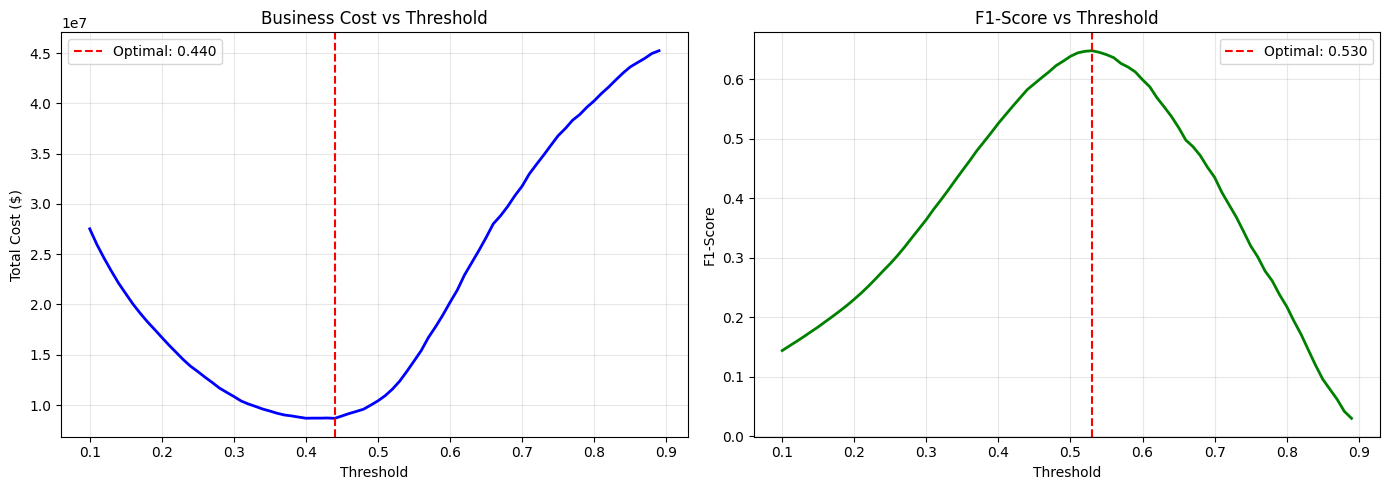



### DEFAULT THRESHOLD (0.5) ###
THRESHOLD: 0.500

Classification Report:
                  precision    recall  f1-score   support

    Class 0 (OK)       0.96      0.95      0.96     17081
Class 1 (Reject)       0.24      0.29      0.26       919

        accuracy                           0.92     18000
       macro avg       0.60      0.62      0.61     18000
    weighted avg       0.92      0.92      0.92     18000


Confusion Matrix:
True Negatives (TN):   16254 - To'g'ri rad etildi
False Positives (FP):    827 - Yaxshi mijoz rad etildi (Yo'qotilgan foyda)
False Negatives (FN):    654 - Yomon mijozga kredit berildi (KATTA ZARAR!) 🚨
True Positives (TP):     265 - To'g'ri rad etildi

BIZNES TA'SIRI:
False Negative xarajati: $6,540,000 (654 ta × $10,000)
False Positive xarajati: $413,500 (827 ta × $500)
UMUMIY XARAJAT:         $6,953,500

ROC-AUC Score: 0.7751


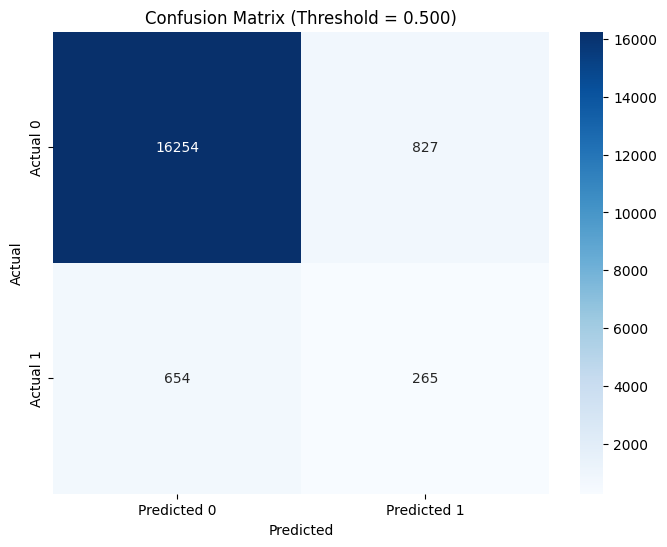



### OPTIMAL THRESHOLD ###
THRESHOLD: 0.440

Classification Report:
                  precision    recall  f1-score   support

    Class 0 (OK)       0.96      0.93      0.95     17081
Class 1 (Reject)       0.22      0.37      0.27       919

        accuracy                           0.90     18000
       macro avg       0.59      0.65      0.61     18000
    weighted avg       0.93      0.90      0.91     18000


Confusion Matrix:
True Negatives (TN):   15847 - To'g'ri rad etildi
False Positives (FP):   1234 - Yaxshi mijoz rad etildi (Yo'qotilgan foyda)
False Negatives (FN):    577 - Yomon mijozga kredit berildi (KATTA ZARAR!) 🚨
True Positives (TP):     342 - To'g'ri rad etildi

BIZNES TA'SIRI:
False Negative xarajati: $5,770,000 (577 ta × $10,000)
False Positive xarajati: $617,000 (1234 ta × $500)
UMUMIY XARAJAT:         $6,387,000

ROC-AUC Score: 0.7751


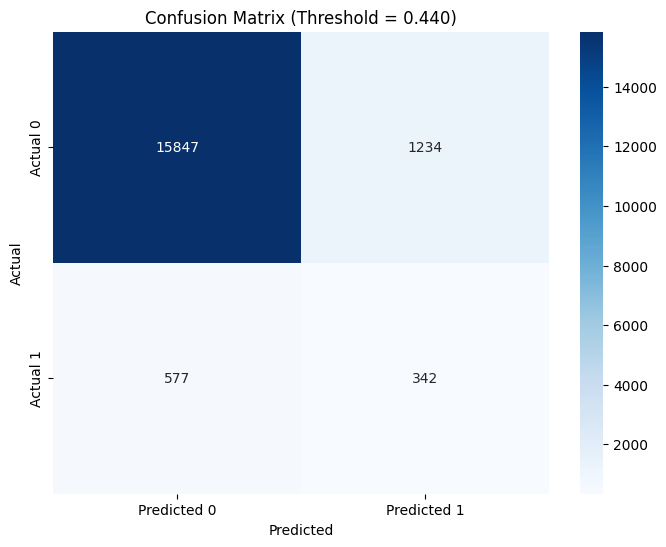

In [119]:
print("Model o'rgatilmoqda...")
model = train_balanced_model(X_train, y_train, weight_ratio=20)


print("\nOptimal threshold topilmoqda...")
optimal_threshold, f1_threshold = find_optimal_threshold(model, X, y, cost_fn=10000, cost_fp=500)


print("\n\n### DEFAULT THRESHOLD (0.5) ###")
metrics_default = evaluate_model(model, X_test, y_test, threshold=0.5)


print("\n\n### OPTIMAL THRESHOLD ###")
metrics_optimal = evaluate_model(model, X_test, y_test, threshold=optimal_threshold)

def compare_results(metrics_before, metrics_after):
    """
    Eski va yangi natijalarni taqqoslash
    """
    print("\n" + "="*70)
    print("TAQQOSLASH: ESKI vs YANGI MODEL")
    print("="*70)
    
    comparison = {
        'Metric': ['Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)', 
                   'ROC-AUC', 'False Negatives', 'Total Cost'],
        'Eski Model': [0.15, 0.54, 0.24, 0.76, 423, '$4,230,000'],
        'Yangi Model': [
            f"{metrics_after['precision']:.2f}",
            f"{metrics_after['recall']:.2f}",
            f"{metrics_after['f1']:.2f}",
            f"{metrics_after['roc_auc']:.2f}",
            metrics_after['fn_count'],
            f"${metrics_after['total_cost']:,}"
        ]
    }
    
    df_comparison = pd.DataFrame(comparison)
    print(df_comparison.to_string(index=False))
    print("="*70)